In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [2]:
# --- Build CNN model ---
model = Sequential([
    Conv2D(16, (5,5), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,466 (91.66 KB)

 Trainable params: 23,466 (91.66 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# --- Load and prepare data ---
mnist = keras.datasets.mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()

# Normalize & reshape for CNN
train_data = train_data.reshape(-1, 28, 28, 1) / 255.0
test_data = test_data.reshape(-1, 28, 28, 1) / 255.0

test_label_original = test_label.copy()

# One-hot encoding
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

In [8]:
# --- Train model ---
train_history = model.fit(train_data, train_label, epochs=10, batch_size=512, verbose=1)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 145ms/step - accuracy: 0.7514 - loss: 0.9621
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - accuracy: 0.9105 - loss: 0.3081
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 136ms/step - accuracy: 0.9352 - loss: 0.2270
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 144ms/step - accuracy: 0.9531 - loss: 0.1655
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 143ms/step - accuracy: 0.9656 - loss: 0.1222
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 138ms/step - accuracy: 0.9734 - loss: 0.0962
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 139ms/step - accuracy: 0.9771 - loss: 0.0822
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 147ms/step - accuracy: 0.9800 - loss: 0.0710
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 138ms/step - accuracy: 0.9815 - loss: 0.0644
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 145ms/step - accuracy: 0.9822 - loss: 0.0612


In [9]:
# --- Evaluate ---
score = model.evaluate(test_data, test_label)
print("Test accuracy:", score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9784 - loss: 0.0675
Test accuracy: 0.982699990272522


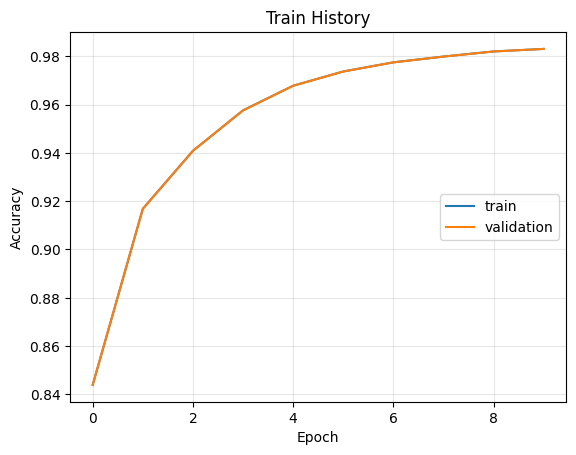

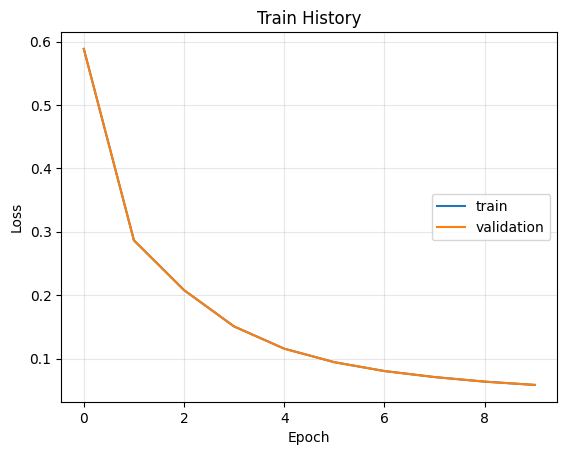

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Confusion Matrix Table:
Predicted Label    0     1     2    3    4    5    6     7    8    9
True Label                                                          
0                978     0     0    0    0    0    0     1    1    0
1                  0  1126     4    1    0    1    2     0    1    0
2                  3     4  1015    0    1    0    1     6    2    0
3                  0     0     3  996    0    4    0     4    2    1
4                  1     0     1    0  969    0    0     3    2    6
5                  2     0     0    3    0  882    3     1    1    0
6                  9     2     0    0    2    2  940     0    3    0
7                  0     1    10    2    0    0    0  1010    2    3
8                  8     0     6    1    2    2    3     9  937    6
9                  6     6     1    2    7    3    0     9    1  974


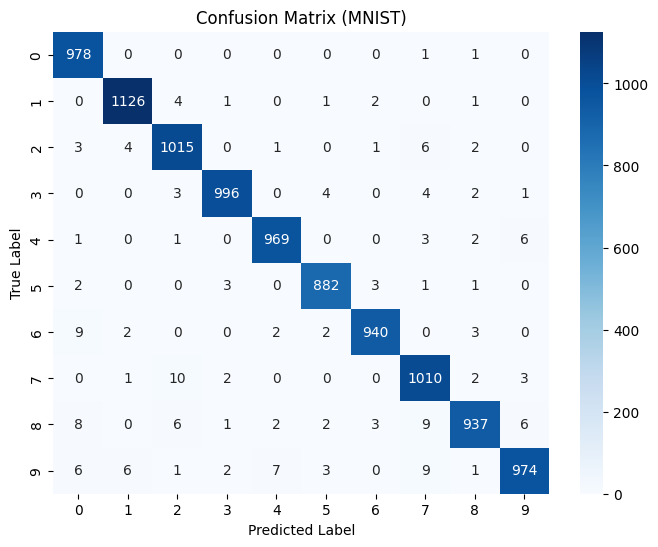

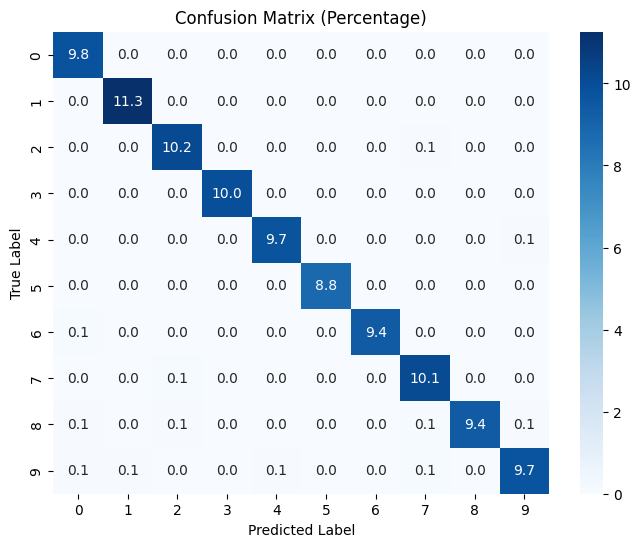

In [12]:
# --- Training accuracy/loss history ---
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train.capitalize())
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.grid(alpha=0.3)
    plt.show()

show_train_history(train_history, 'accuracy', 'accuracy')
show_train_history(train_history, 'loss', 'loss')


# --- Confusion Matrix (Table + Heatmap) ---
prediction = model.predict(test_data)
prediction_label = np.argmax(prediction, axis=1)

# 1️⃣ Text-based confusion table
print("\nConfusion Matrix Table:")
cm_table = pd.crosstab(test_label_original, prediction_label,
                       rownames=['True Label'], colnames=['Predicted Label'])
print(cm_table)

# 2️⃣ Heatmap version (with counts)
cm = confusion_matrix(test_label_original, prediction_label)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (MNIST)')
plt.show()

# 3️⃣ Heatmap version (with percentages)
cm_percent = cm / np.sum(cm) * 100
plt.figure(figsize=(8,6))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Percentage)')
plt.show()
